### Bayes.ipynb might contain overlapping themes

# Normal Distribution

### Continuous distributions - The Gaussian or normal distribution

> **Motivation:** In this exercise, we introduce a very common continuous probability distribution, the normal or Gaussian distribution. We will be using Gaussians *a lot* in this course to model priors and sensory noise, so it is good you become very familiar with them.

The probability density function (pdf) of a Gaussian (or normal) distribution is defined as
$$
\mathcal{N}\left(x; \mu, \sigma^2\right) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left[-\frac{\left(x - \mu \right)^2}{2 \sigma^2} \right].
$$
where $\mu$ is the *mean* (or *location*) parameter of the distribution and $\sigma^2$ its *variance* parameter (and thus $\sigma > 0$ is the *standard deviation* or *scale*). The so-called "standard normal" distribution is a normal distribution with zero mean and unit variance ($\mu = 0, \sigma^2 = 1$).

*Notes*:
- **Be careful**: While in mathematical notation, $\mathcal{N}\left(x; \mu, \sigma^2 \right)$, the distribution parameters are almost always the mean $\mu$ and variance $\sigma^2$, in almost all statistical programming libraries the pdf of the normal distribution, e.g. `scipy.stats.norm.pdf`, takes as distribution parameters the mean $\mu$ and the *scale* (i.e. *standard deviation*) $\sigma$, **not** the variance! This difference is a common source of mistakes.
- You can find the normal pdf equivalently written as $\mathcal{N}\left(x| \mu, \sigma^2 \right)$ or $\mathcal{N}\left(x; \mu, \sigma^2 \right)$, with $|$ or $;$ used to separate the random variable from the parameters. There is no particular meaning behind using one or the other, and we will be using both interexchangeably during the course.
- Note that a Gaussian distribution is symmetric with respect to a swap of the argument $x$ and the mean parameter $\mu$, that is
$$
\mathcal{N}\left(x; \mu, \sigma^2\right) = \mathcal{N}\left(\mu; x, \sigma^2\right),
$$
can you immediately see why? *Hint*: Look at the equation for the pdf.

### Example

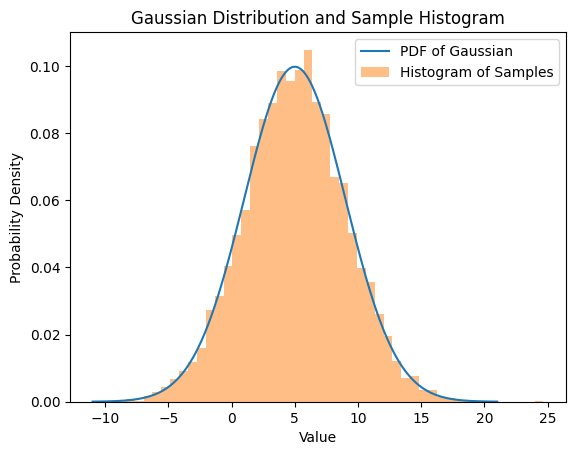

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mu = 5
sigma = 4 # Use sigma value with scipy.stats.norm, not sigma^2

# Create a linearly spaced grid of points
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000) #range of values from start to stop with 1000 points in between

# Evaluate the pdf of the normal distribution
pdf = norm.pdf(x, mu, sigma) # Use sigma value with scipy.stats.norm, not sigma^2

# Plot the pdf
plt.plot(x, pdf, label='PDF of Gaussian')

# Generate N_samples samples from the Gaussian distribution
N_samples = 10**4
samples = np.random.normal(mu, sigma, N_samples)

# Plot the histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Histogram of Samples')

# Add labels and a legend
plt.title('Gaussian Distribution and Sample Histogram')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

### Product of two Gaussian distributions (numerical)

Consider the product of two Gaussian pdfs:
$$
g(x) = \mathcal{N}\left(x; \mu_1, \sigma_1^2\right) \cdot \mathcal{N}\left(x; \mu_2, \sigma_2^2\right) \equiv \mathcal{N}_1\left(x\right) \cdot \mathcal{N}_2\left(x\right)
$$
with $\mu_1 = -5$, $\sigma_1 = 1$, $\mu_2 = 1$, $\sigma_2 = 3$.

- a) Compute $g(x)$ numerically, by elementwise multiplication of $\mathcal{N}_1(x)$ and $\mathcal{N}_2(x)$ on an adequately fine grid for $x$.  Plot in the same graph $g(x)$, $\mathcal{N}_1(x)$ and $\mathcal{N}_2(x)$.
- b) Is $g(x)$ normalized? Compute the normalization constant for $g(x)$, $$Z_g = \int g(x) dx$$ via numerical integration. *Hint:* You can use numerical integration functions from `scipy.integrate`, which you can find [here](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Look at the functions that take a fixed grid spacing, such as `scipy.integrate.romb` or `scipy.integrate.trapezoid`.
- c) Let $$q(x) \equiv g(x) / Z_g$$ be the normalized product of the two Gaussians. Make another plot with $\mathcal{N}_1(x)$, $\mathcal{N}_2(x)$ and $q(x)$. What do you observe about $q(x)$?
- d) Is the distribution resulting from the (normalized) product of two Gaussian pdfs the same as the distribution resulting from the product of two Gaussian random variables?

### Product of 2 gaussian distributions

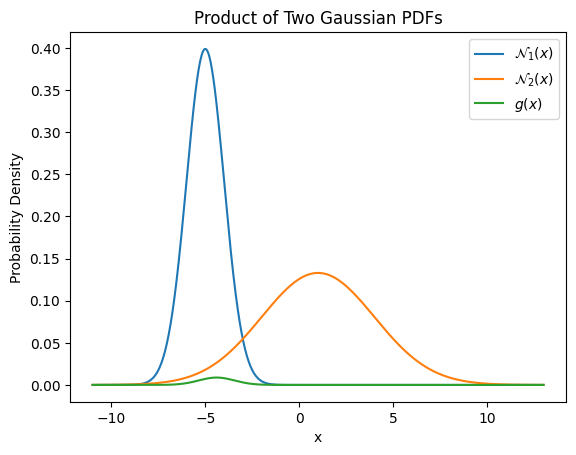

Normalization constant Z_g: 0.020853550036246678


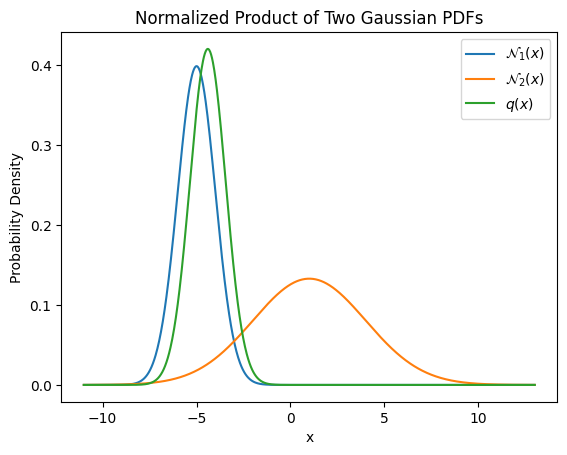

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distributions
mu1, sigma1 = -5, 1
mu2, sigma2 = 1, 3

# Create a linearly spaced grid of points
x = np.linspace(min(mu1 - 4*sigma1, mu2 - 4*sigma2), max(mu1 + 4*sigma1, mu2 + 4*sigma2), 1000)

# Compute the Gaussian pdfs
pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)

# Compute the product of the two Gaussian pdfs
g_x = pdf1 * pdf2

# Plot the results
plt.plot(x, pdf1, label='$\mathcal{N}_1(x)$')
plt.plot(x, pdf2, label='$\mathcal{N}_2(x)$')
plt.plot(x, g_x, label='$g(x)$')
plt.title('Product of Two Gaussian PDFs')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

from scipy.integrate import trapezoid

# Compute the normalization constant Z_g
Z_g = trapezoid(g_x, x)

print(f'Normalization constant Z_g: {Z_g}')

# Compute the normalized product q(x)
q_x = g_x / Z_g

# Plot the results
plt.plot(x, pdf1, label='$\mathcal{N}_1(x)$')
plt.plot(x, pdf2, label='$\mathcal{N}_2(x)$')
plt.plot(x, q_x, label='$q(x)$')
plt.title('Normalized Product of Two Gaussian PDFs')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### Product of two Gaussian distributions (analytical)

> **Motivation:** As seen in the previous exercise with an example, the product of two Gaussian pdfs turns out to be a (rescaled) Gaussian! In fact, there is an analytical expression for this product which is one of the most useful mathematical identities in this course. Here, we will examine this identity.

The product of two Gaussian pdfs can be calculated analytically via the "*the fundamental Gaussian identity*":
$$
\mathcal{N}\left(x; \mu_1, \sigma_1^2\right) \cdot \mathcal{N}\left(x; \mu_2, \sigma_2^2\right) = 
\mathcal{N}\left(\mu_1; \mu_2, \sigma_1^2 + \sigma_2^2\right) \cdot  
\mathcal{N}\left( x; \frac{\mu_1 \sigma_2^2 + \mu_2 \sigma_1^2}{\sigma_1^2 + \sigma_2^2}, \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}\right).
$$
The key aspect of this identity is that in the left-hand-side (l.h.s.) there are two Gaussians that both depend on $x$, while on the r.h.s. only one Gaussian depends on $x$, while the other Gaussian is a constant (in $x$). The r.h.s. makes manipulating the expression in later computations very simple, by using standard facts about pdfs (e.g., we know that $\int \mathcal{N}(x) dx = 1$).

$Z = \mathcal{N}\left(\mu_1; \mu_2, \sigma_1^2 + \sigma_2^2\right)$

$q(x) = \mathcal{N}\left( x; \frac{\mu_1 \sigma_2^2 + \mu_2 \sigma_1^2}{\sigma_1^2 + \sigma_2^2}, \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}\right)$

## Expectations and variance

### Expectations of functions under probability distributions

We recall that for a discrete random variable $X$, the mean, variance, and expected value of $f(x)$ are:
$$
\mathbb{E}[X] = \sum_x x \cdot p(x), \quad 
\text{Var}\left[X\right] = \sum_x(x - \mathbb{E}[X])^2 p(x), \quad
\mathbb{E}[f(X)] = \sum_x f(x) \cdot p(x).
$$
Similarly, for a continuous random variable $X$ with probability density (pdf) $p(x)$, we have:
$$
\mathbb{E}[X] = \int x  p(x) dx, \quad 
\text{Var}\left[X\right] = \int (x - \mathbb{E}[X])^2 p(x) dx, \quad
\mathbb{E}[f(X)] = \int f(x) \cdot p(x) dx,
$$
where the integral is over the support of variable (unless specified otherwise, from $-\infty$ to $\infty$).

Note that with algebraic manipulations the variance can be conveniently rewritten as:
$$
\text{Var}\left[X\right] = \mathbb{E}[X^2] - \mathbb{E}[X]^2.
$$

There are three basic ways to compute expectations $\mathbb{E}[f(X)]$:

- **Analytically**: Sometimes we can compute the integrals above in an analytical closed form.
- **Numerical integration**: We can evaluate $p(x) \cdot f(x)$ on a grid and compute the integral numerically (e.g., via some function in `scipy.integrate`).
- **Simple Monte Carlo (aka sampling)**: Assuming we can draw random samples from $p(x)$ (for example, if $p(x)$ is Gaussian we can do so), we can approximate the expectation as follows:
$$
\mathbb{E}[f(X)] \approx \frac{1}{N_\text{s}} \sum_{i = 1}^{N_\text{s}} f(x_i)
$$
where $x_i \sim p(x)$ (this notation means "$x_i$ is a random sample from $p(x)$"), and $N_\text{s}$ is the number of samples we are using (ideally a large number to reduce numerical error).


#### Tasks:

Compute the expectation of the function $f(x) = 1 - x + 3 x^2 $ for a Gaussian distribution with $\mu = 2$ and $\sigma = 3$.

- a) Compute the variance numerically, via numerical integration.
- b) Compute the variance via simple Monte Carlo, by drawing $N_\text{s}$ samples from a normal distribution.

In [3]:
# a)
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad

# Parameters for the Gaussian distribution
mu = 2
sigma = 3

# Analytically compute the expectation of f(x)
expectation, _ = quad(lambda x: (1 - x + 3*x**2) * norm.pdf(x, mu, sigma), -np.inf, np.inf)
expectation_X2, _ = quad(lambda x: (1 - x + 3*x**2)**2 * norm.pdf(x, mu, sigma), -np.inf, np.inf)

# Numerically compute the variance
variance = expectation_X2 - expectation**2

print(f'Expectation: {expectation}')
print(f'Variance (numerical integration): {variance}')

# b)
# Number of samples
N_s = 10**5

# Generate random samples from the Gaussian distribution
samples = np.random.normal(mu, sigma, N_s)
f_values = 1 - samples + 3*samples**2

# Compute the expectation of f(x) using simple Monte Carlo
expectation_mc = np.mean(f_values)

# Compute the variance using simple Monte Carlo
variance_mc = np.var(f_values)
#variance_mc = np.mean(f_values**2) - np.mean(f_values)**2

print(f'Expectation (Monte Carlo): {expectation_mc}')
print(f'Variance (Monte Carlo): {variance_mc}')

Expectation: 38.000000000000014
Variance (numerical integration): 2547.0000000000673
Expectation (Monte Carlo): 38.01424532684491
Variance (Monte Carlo): 2536.230269235255


# Maximum-likelihood eastimate (MLE) vs bayesian estimate

> Please explain to me the difference in Bayesian estimate and Maximum likelihood estimate.

It is a very broad question and my answer here only begins to scratch the surface a bit. I will use the Bayes's rule to explain the concepts.

Let’s assume that a set of probability distribution parameters, θ
, best explains the dataset D
. We may wish to estimate the parameters θ
 with the help of the Bayes’ Rule:

$$
p(\text{θ} | \text{D}) = \frac{p(\text{D}|\text{θ}) * p(\text{θ})}{p(\text{D})}
$$

$$
posterior = \frac{likelihood * prior}{evidence}
$$


The explanations follow:

**Maximum Likelihood Estimate**

With MLE,we seek a point value for θ
 which maximizes the likelihood, p(D|θ)
, shown in the equation(s) above. We can denote this value as θ^
. In MLE, θ^
 is a point estimate, not a random variable.

In other words, in the equation above, MLE treats the term p(θ)p(D)
 as a constant and does NOT allow us to inject our prior beliefs, p(θ)
, about the likely values for θ
 in the estimation calculations.

**Bayesian Estimate**

Bayesian estimation, by contrast, fully calculates (or at times approximates) the posterior distribution p(θ|D)
. Bayesian inference treats θ
 as a random variable. In Bayesian estimation, we put in probability density functions and get out probability density functions, rather than a single point as in MLE.

Of all the θ
 values made possible by the output distribution p(θ|D)
, it is our job to select a value that we consider best in some sense. For example, we may choose the expected value of θ
 assuming its variance is small enough. The variance that we can calculate for the parameter θ
 from its posterior distribution allows us to express our confidence in any specific value we may use as an estimate. If the variance is too large, we may declare that there does not exist a good estimate for θ
.

As a trade-off, Bayesian estimation is made complex by the fact that we now have to deal with the denominator in the Bayes' rule, i.e. evidence
. Here evidence -or probability of evidence- is represented by:

p(D)=∫θp(D|θ)∗p(θ)dθ

This leads to the concept of 'conjugate priors' in Bayesian estimation. For a given likelihood function, if we have a choice regarding how we express our prior beliefs, we must use that form which allows us to carry out the integration shown above. The idea of conjugate priors and how they are practically implemented are explained quite well in this post by COOlSerdash.